In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges


In [2]:
main.dir = "/mounts/tscc/projects/Li-Fraumeni/data/family3/rna-seq/updated_runs/"
main.file = file.path(main.dir, "11292015_Tanner_RNASeq", "annotated_combined.counts")

#### Load Data

In [3]:
count.data = read.table(main.file, row.names=1, header=TRUE)
gene.symbols = count.data$symbol
count.data = count.data[,1:dim(count.data)[2]-1]

In [4]:
head(count.data)

,X001_002_RNA_Blood_Scripps.1_09.25.14,X001_002_RNA_Blood_Scripps.5_10.29.14,X001_002_RNA_Blood_Scripps.7_11.25.14,X001_002_RNA_Blood_Scripps.9.1_12.19.14,X001_002_RNA_Blood_Scripps.10.1_02.02.15,X001_002_RNA_Blood_Scripps.11.1_03.17.15,X001_002_RNA_Blood_Scripps.12.1_04.06.15,X001_002_RNA_Blood_Scripps.13.1_05.11.15,X001_002_RNA_Blood_Scripps.14.1_06.10.15,X001_002_RNA_Blood_Scripps.15.1_07.02.15,X001_002_RNA_Blood_Scripps.16.1_08.10.15,X001_003_RNA_Blood_Scripps.2_09.25.14,X001_003_RNA_Blood_Scripps.6_10.29.14,X001_003_RNA_Blood_Scripps.8_11.25.14,X001_004_RNA_Blood_Scripps.3_09.25.14,X001_005_RNA_Blood_Scripps.4_09.25.14
ENSG00000223972,1,0,5,1,1,3,4,0,1,0,0,1,0,0,1,0
ENSG00000227232,9,6,2,1,2,6,8,1,4,1,1,2,6,1,3,6
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000240361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
samples = colnames(count.data)
sample.ids = sapply(strsplit(samples, '_'), function(x) {x[2]})
sample.dates = sapply(strsplit(samples, '_'), function(x) {x[length(x)]})
samples = paste(sample.ids, sample.dates, sep='_')

In [6]:
colnames(count.data)

[1] "X001_002_RNA_Blood_Scripps.1_09.25.14"   
 [2] "X001_002_RNA_Blood_Scripps.5_10.29.14"   
 [3] "X001_002_RNA_Blood_Scripps.7_11.25.14"   
 [4] "X001_002_RNA_Blood_Scripps.9.1_12.19.14" 
 [5] "X001_002_RNA_Blood_Scripps.10.1_02.02.15"
 [6] "X001_002_RNA_Blood_Scripps.11.1_03.17.15"
 [7] "X001_002_RNA_Blood_Scripps.12.1_04.06.15"
 [8] "X001_002_RNA_Blood_Scripps.13.1_05.11.15"
 [9] "X001_002_RNA_Blood_Scripps.14.1_06.10.15"
[10] "X001_002_RNA_Blood_Scripps.15.1_07.02.15"
[11] "X001_002_RNA_Blood_Scripps.16.1_08.10.15"
[12] "X001_003_RNA_Blood_Scripps.2_09.25.14"   
[13] "X001_003_RNA_Blood_Scripps.6_10.29.14"   
[14] "X001_003_RNA_Blood_Scripps.8_11.25.14"   
[15] "X001_004_RNA_Blood_Scripps.3_09.25.14"   
[16] "X001_005_RNA_Blood_Scripps.4_09.25.14"

In [7]:
column.data = data.frame(cbind(sample.ids, sample.dates))
column.data[,'sample.ids'] = as.factor(column.data[,'sample.ids'])
column.data[,'sample.dates'] = as.factor(as.Date(column.data[,'sample.dates'], 
                                    "%m.%d.%y"))

In [8]:
rownames(column.data) = samples
colnames(count.data) = samples

In [45]:
?DESeqDataSetFromMatrix

DESeqDataSet-class {DESeq2},R Documentation
se,"a RangedSummarizedExperiment with columns of variables indicating sample information in colData, and the counts as the first element in the assays list, which will be renamed ""counts"". A RangedSummarizedExperiment object can be generated by the function summarizeOverlaps in the GenomicAlignments package."
design,"a formula which expresses how the counts for each gene depend on the variables in colData. Many R formula are valid, including designs with multiple variables, e.g., ~ group + condition, and designs with interactions, e.g., ~ genotype + treatment + genotype:treatment. See results for a variety of designs and how to extract results tables. By default, the functions in this package will use the last variable in the formula for building results tables and plotting. ~ 1 can be used for no design, although users need to remember to switch to another design for differential testing."
ignoreRank,use of this argument is reserved for DEXSeq developers only. Users will immediately encounter an error upon trying to estimate dispersion using a design with a model matrix which is not full rank.
countData,for matrix input: a matrix of non-negative integers
colData,for matrix input: a DataFrame or data.frame with at least a single column. Rows of colData correspond to columns of countData
tidy,for matrix input: whether the first column of countData is the rownames for the count matrix
...,"arguments provided to SummarizedExperiment including rowRanges and metadata. Note that for Bioconductor 3.1, rowRanges must be a GRanges or GRangesList, with potential metadata columns as a DataFrame accessed and stored with mcols. If a user wants to store metadata columns about the rows of the countData, but does not have GRanges or GRangesList information, first construct the DESeqDataSet without rowRanges and then add the DataFrame with mcols(dds)."
sampleTable,"for htseq-count: a data.frame with three or more columns. Each row describes one sample. The first column is the sample name, the second column the file name of the count file generated by htseq-count, and the remaining columns are sample metadata which will be stored in colData"
directory,for htseq-count: the directory relative to which the filenames are specified. defaults to current directory


In [61]:
dds = DESeqDataSetFromMatrix(count.data, column.data, ~ sample.ids)

In [62]:
head(dds)

class: DESeqDataSet 
dim: 6 16 
metadata(0):
assays(1): counts
rownames(6): ENSG00000223972 ENSG00000227232 ... ENSG00000268020
  ENSG00000240361
rowRanges metadata column names(0):
colnames(16): 002_09.25.14 002_10.29.14 ... 004_09.25.14 005_09.25.14
colData names(2): sample.ids sample.dates

#### Calculate Normalized Values

In [63]:
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates


In [64]:
normalized.counts = counts(dds,normalized=TRUE)

#### Variance Stabilization

In [65]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)
rlogMat <- assay(rld)
vstMat <- assay(vsd)

### Heatmaps

In [66]:
library("RColorBrewer")
library("gplots")
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:30]
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)

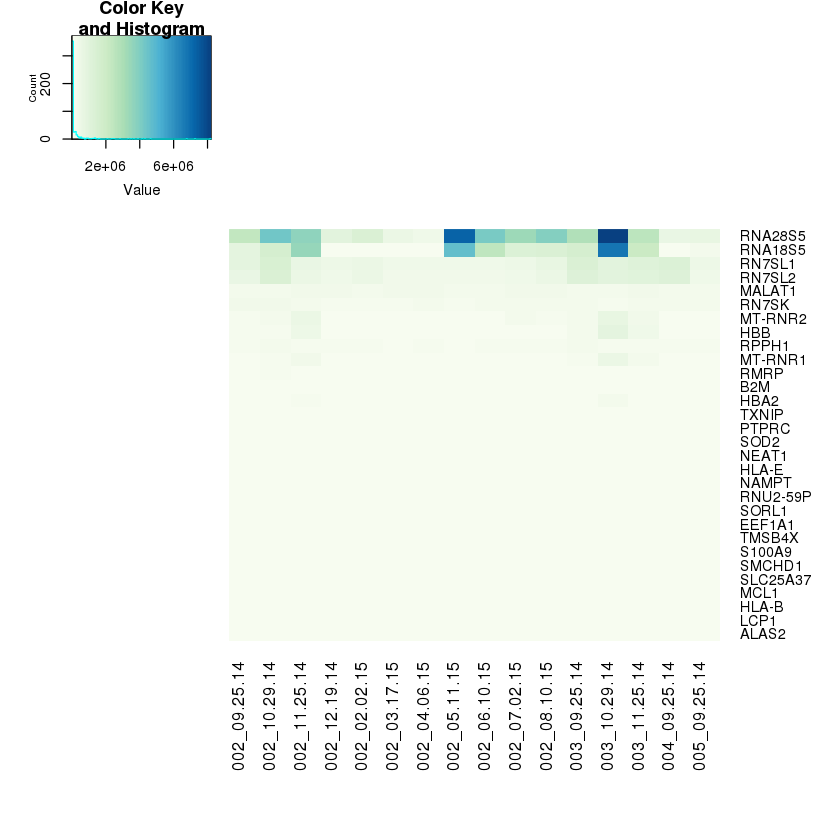

In [67]:
data = counts(dds,normalized=TRUE)[select,]
rownames(data) = gene.symbols[select]
heatmap.2(data, col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10,6))

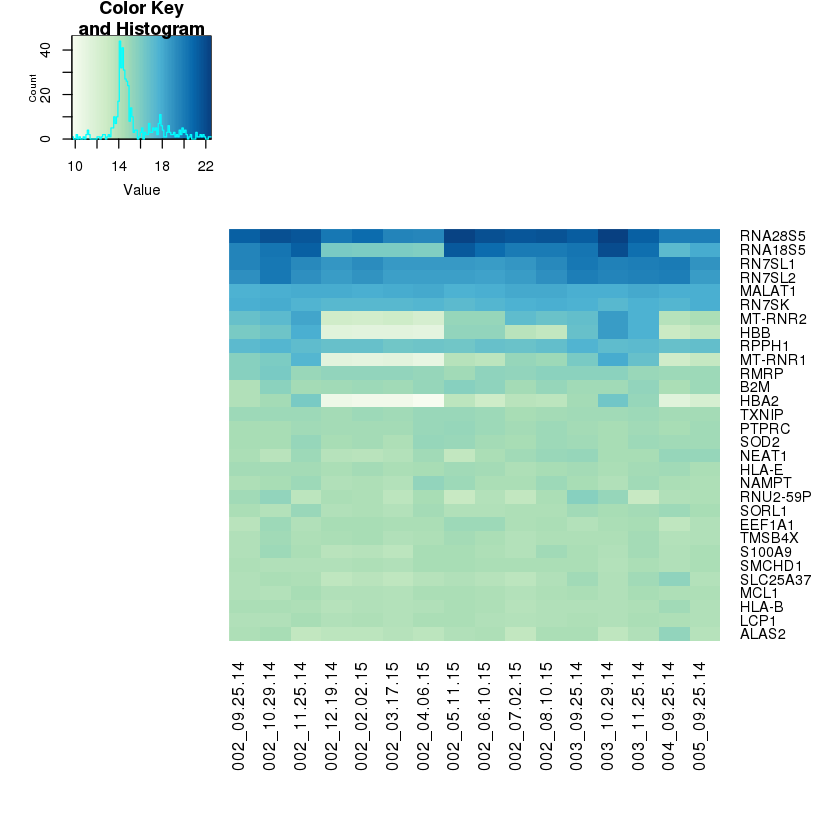

In [68]:
data = assay(rld)[select,]
rownames(data) = gene.symbols[select]
heatmap.2(data, col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10, 6))

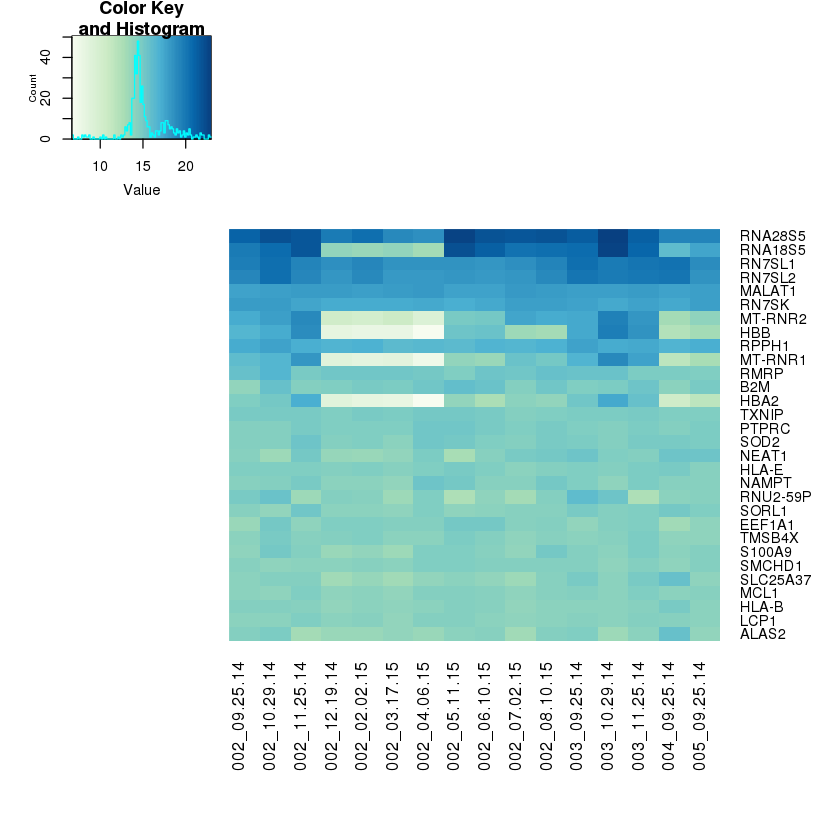

In [69]:
data = assay(vsd)[select,]
rownames(data) = gene.symbols[select]
heatmap.2(data, col = hmcol,
Rowv = FALSE, Colv = FALSE, scale="none",
dendrogram="none", trace="none", margin=c(10, 6))

ERROR: Error in eval(expr, envir, enclos): object 'condition' not found


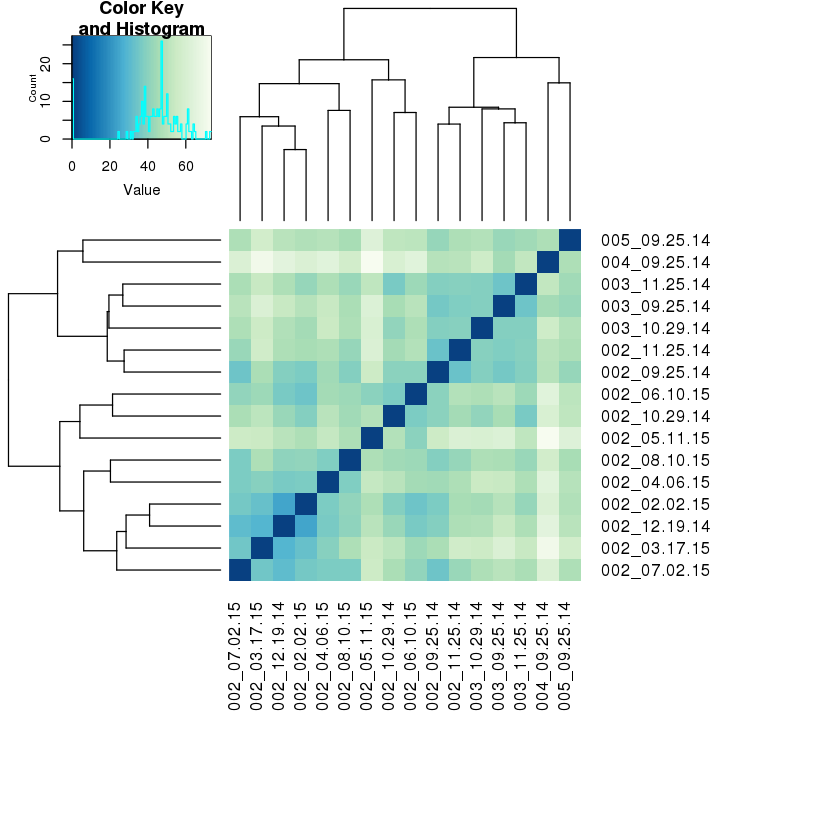

In [70]:
distsRL <- dist(t(assay(rld)))
mat <- as.matrix(distsRL)
rownames(mat) <- colnames(mat) <- with(colData(dds),
paste(condition, type, sep=" : "))
hc <- hclust(distsRL)
heatmap.2(mat, Rowv=as.dendrogram(hc),
symm=TRUE, trace="none",
col = rev(hmcol), margin=c(13, 13))

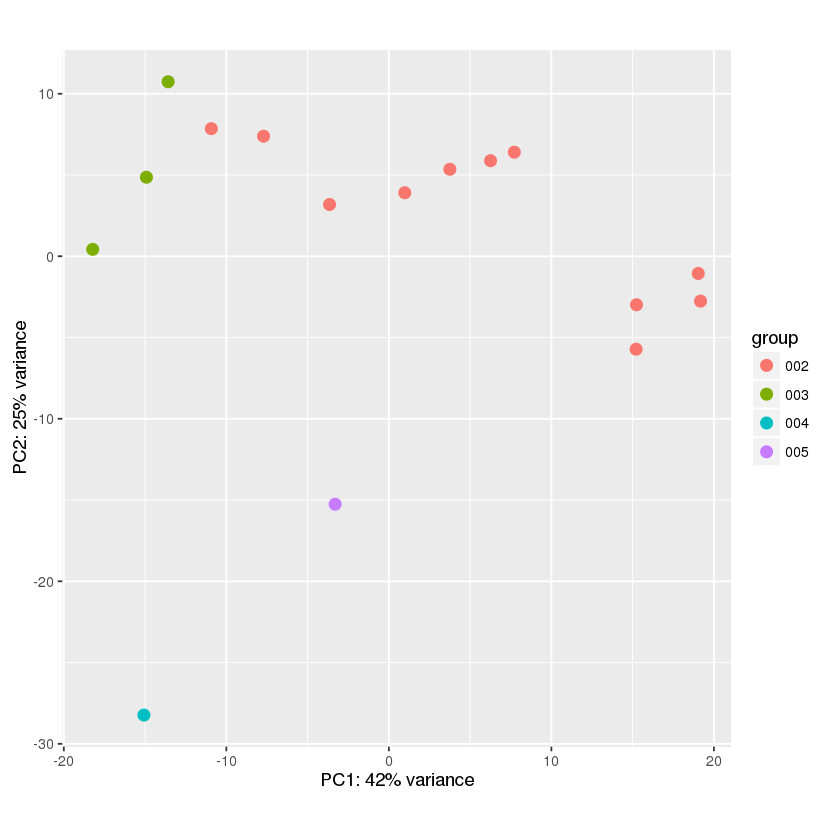

In [71]:
plotPCA(DESeqTransform(vsd), intgroup=c("sample.ids"))

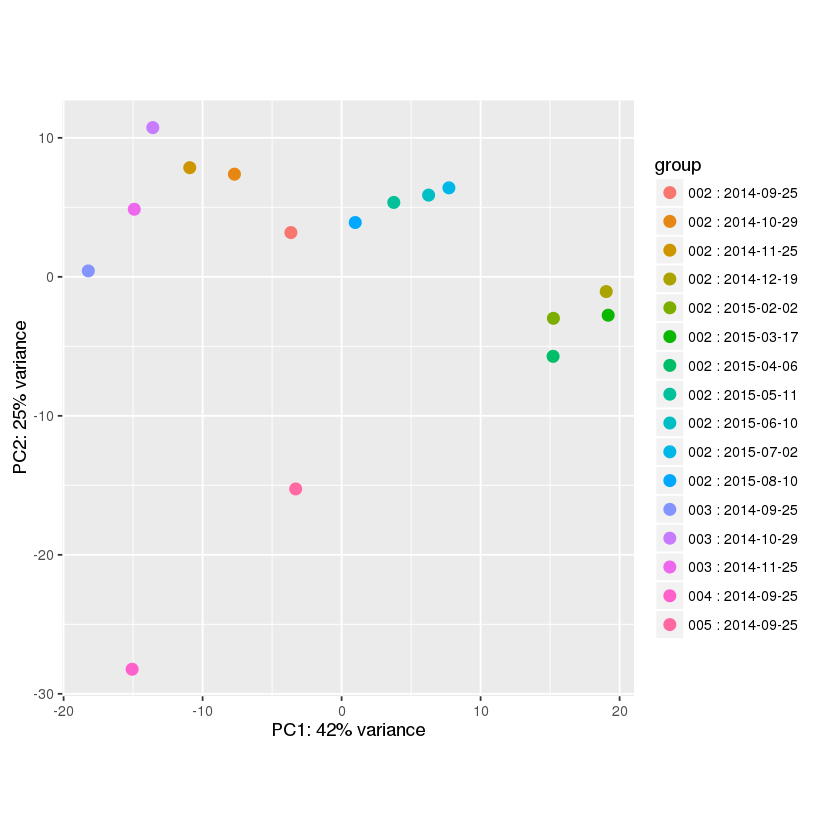

In [72]:
plotPCA(DESeqTransform(vsd), intgroup=c("sample.ids", "sample.dates"))

#### Write all these files

In [73]:
deseq.file = gsub("annotated_combined.counts","deseq.counts", main.file)
write.table(counts(dds,normalized=TRUE), deseq.file, sep="\t")

In [74]:
regularized.log.file = gsub("annotated_combined.counts","deseq.regularized.log.counts", main.file)
write.table(assay(rld), regularized.log.file, sep="\t")

In [75]:
variance.stabilized.file = gsub("annotated_combined.counts","deseq.variance.stablized.counts", main.file)
write.table(assay(vsd), variance.stabilized.file, sep="\t")